In [31]:
def h(theta, x):
    a = 1 / (1 + np.exp(-np.dot(theta, x.T)))
    if a is np.array:
        #Prevent 0's and inf under log function
        a[np.where(a == 0)] = 10 ** -9
        a[np.where(a == 1)] = 0.999999
    return a

def split(data):
    examples, features = data.shape
    x, y = (enrich_features(normalize(data[0:, :features - 1])), data[0:, features - 1])
    return x, y

def bias(x):
    count, col = x.shape
    return np.column_stack((np.ones(count), x))     

def train(data, lr=0.08, iter=100000,rr=0):
    x, y = split(data)
    print(y[:])
    bias_ = bias(x)
    thetha = np.zeros(bias_.shape[1], dtype=np.float128)
    costs = np.zeros(iter)   
    for i in range(iter):
        costs[i] = (1 / x.shape[0]) * np.sum(np.dot(-y, np.log(h(thetha,bias_))) - np.dot((1 - y), np.log(1 - h(thetha, bias_))))
        thetha_new = thetha - lr * (1/ (x.shape[0])) * np.sum((h(thetha, bias_) - y)* bias_.T, axis=1)
        thetha_reg = thetha * (rr / x.shape[0])
        thetha_reg[0] = 0
        thetha = thetha_new + thetha_reg
    return thetha, costs


def enrich_features(x, power=14):
    m, features = x.shape
    for p in range(2, power + 1):
        for f in range(features):
            x = np.append(x, np.power(x[0:, f], p).reshape(m, 1), axis=1)
    return x

def normalize(x):
    m, features = x.shape
    for i in range(features):
        x[0:, i] = (x[0:, i] - x[0:, i].min()) / (x[0:, i].max() - x[0:, i].min())

    return x

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#Reading the data from file.
data = np.genfromtxt("../l2_data.txt", delimiter=",", dtype=np.float128)

In [33]:
x, y = split(data)

In [34]:
theta, costs = train(data)

[ 0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0
  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0
  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0
  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0
  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0
  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0]


In [8]:
#Predict function for logistic regression
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = h(theta, x_bias)
    return y
predicted = predict(theta, x)

In [9]:
conf = 0.5
accuracy = (((predicted > conf).astype(int)) == y).sum() / len(y)

print("Accuracy:", accuracy)

Accuracy: 0.96


In [10]:
#Redefine plotting 
def get_bound(theta):
    pts = []
    for i in np.arange(0.0, 1.0, 0.005):
        for j in np.arange(0.0, 1.0, 0.005):
            a = h(theta, np.column_stack((np.ones(1), enrich_features(np.array([i, j]).reshape(1, 2)))))
            if 0.49 < a < 0.51:
                pts = [*pts, (i, j)]
    points = np.array(pts)
    if len(points) == 0:
        return np.array([[1], [1]])
    return points[0:, 0], points[0:, 1]


def plot_data(data, predicted, costs, bound):
    x, y = data
    xb, yb = bound
    fig, (g1, g2, g3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
    g1.plot(x[np.where(y == 1)][0:, 0], x[np.where(y == 1)][0:, 1], 'o', markersize=3)
    g1.plot(x[np.where(y == 0)][0:, 0], x[np.where(y == 0)][0:, 1], 'x', markersize=3)
    g1.plot(xb, yb, 'o', markersize=1)

    g2.plot(x[np.where(predicted > 0.5)][0:, 0], x[np.where(predicted > 0.5)][0:, 1], 'o', markersize=3)
    g2.plot(x[np.where(predicted <= 0.5)][0:, 0], x[np.where(predicted <= 0.5)][0:, 1], 'x', markersize=3)
    g2.plot(xb, yb, 'o', markersize=1)

    g1.axis([x.min() - x.mean(), x.max() + x.mean(), x.min() - x.mean(), x.max() + x.mean()])
    g2.axis([x.min() - x.mean(), x.max() + x.mean(), x.min() - x.mean(), x.max() + x.mean()])

    g3.plot(costs)
    plt.show()

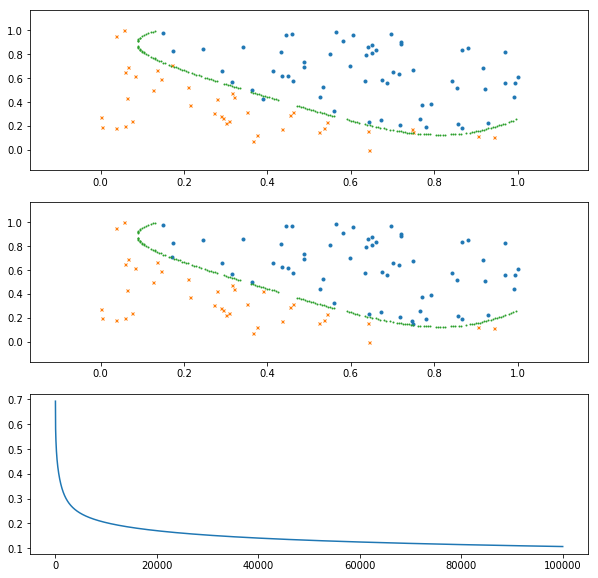

In [11]:


#Do the plotting!
bound = get_bound(theta)
plot_data((x, y), predicted, costs, bound)

In [225]:
data = np.genfromtxt("../l2_data_2.txt", delimiter=",", dtype=np.float128)

In [226]:
def plot_data_raw(data):
    plt.plot(data[np.where(data[:,2] == 1)][:,0], data[np.where(data[:,2] == 1)][:,1], 'o')
    plt.plot(data[np.where(data[:,2] == 0)][:,0], data[np.where(data[:,2] == 0)][:,1], 'o')
    plt.show()

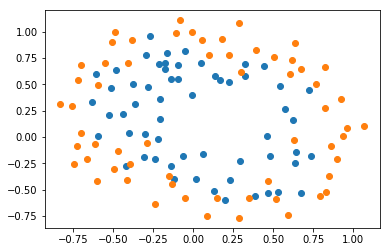

In [227]:
plot_data_raw(data)